# Deep learning for Iris Dataset

In [2]:
# 如果在 coLab 上執行這個程式碼，那要跑下一行，選擇 TensorFlow 2.x 版本
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


## Import libraries

In [2]:
# import tensorflow and check out the version
import tensorflow
from tensorflow import keras
print(tensorflow.__version__)

2.1.0


## Import Iris dataset

In [3]:
import pandas as pd
url = 'http://bit.ly/IEMIRIS'
df = pd.read_csv(url)
df.head(5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Split the data set

In [5]:
x = df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df.loc[:, ['Species']]
y.head(5)

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [34]:
# 另一種更簡潔的寫法 (another short-hand style)
# 第一個 : 代表取所有的 row 的資料，之後的 0:4 代表取第 0 到第 3 個 columns (注意，不包含第 4 個 column)
# The : means the retrival of all the rows. 0:4 means that we want to obtain the first (i.e., 0) to the third (i.e., 4-1 = 3) columns 
x = df.iloc[:, 0:4]
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)



## Design the model

The model is as following (see the following figure). 

The input layer contains 4 units.

There are 8 neurals with the ``relu`` activation function in the hidden layer.

The output layer contains 3 neurals.

下圖展示了我們的模型。

輸入層有 4 個元素。

隱藏層有 8 個神經元。使用 relu 做為激活函數。

最後輸出層有 3 個神經元，每一個神經元對應一種鳶尾花的類別。

![](iris_dnn.png)

In [10]:
model = keras.models.Sequential()
#first input layer
model.add(keras.layers.Dense(8, input_dim=4, activation='relu'))
#output layer
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train our model

``Fit`` function trains the model for a fixed number of epochs (iterations on a dataset).

The document is [here](https://keras.io/models/model/).

使用 ``fit`` 函式來訓練我們設計好的模型。

相關說明請參考[這裏](https://keras.io/models/model/)。

Important parameters (重要參數)：
- **x**: Input data. 輸入的資料，即 x_train
- **y**: Target data. 所要預測的對象，即 y_train
- **epochs**: Number of epochs to train the model. 要訓練的回合數。回合數越高，可能有較高的 accuracy，但也可能造成 overfit。
- **verbos**: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 訓練過程中，要秀出訓練中的訊息嗎？ 0 代表不秀出任何訊息。 1 為預設值，代表秀出 progress bar，2 代表每一 epoch 秀一行。
- **batch_size**: Number of samples per gradient update. 做梯度更新時，一次要考量多少的資料量。預設值是 32。 

Returns (回傳值)

A History object. Its ``History.history`` attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

回傳一個名為 History 的物件，此物件中的 history (即 ``History.history``) 記錄著訓練過程中每一個 epoch 的 loss values 以及評量準則的值 (例如你的評量準則是 accuracy，那就會記錄 accuracy)。如果你有指定驗證集（validation set）的話，那也會順便回傳驗證集的 validation loss，以及驗證集的評量準則值. 

In [12]:
print(type(x_train))
print(type(y_train))
history = model.fit(x_train, y_train, epochs=500)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Train on 105 samples
Epoch 1/500
105/105 [==============================] - 1s 5ms/sample - loss: 1.8552 - accuracy: 0.2000
Epoch 2/500
105/105 [==============================] - 0s 91us/sample - loss: 1.8138 - accuracy: 0.2000
Epoch 3/500
105/105 [==============================] - 0s 101us/sample - loss: 1.7743 - accuracy: 0.2095
Epoch 4/500
105/105 [==============================] - 0s 86us/sample - loss: 1.7359 - accuracy: 0.2095
Epoch 5/500
105/105 [==============================] - 0s 104us/sample - loss: 1.6989 - accuracy: 0.2190
Epoch 6/500
105/105 [==============================] - 0s 90us/sample - loss: 1.6622 - accuracy: 0.2190
Epoch 7/500
105/105 [==============================] - 0s 92us/sample - loss: 1.6275 - accuracy: 0.2190
Epoch 8/500
105/105 [==============================] - 0s 97us/sample - loss: 1.5889 - accuracy: 0.2190
Epoch 9/500
105/105 [==============================] - 0s 111us/sample - loss: 1.5557 - accuracy: 

## Accuracy of the testing dataset

We use the ``evaluate`` function to return the loss value & metrics values for the model in test mode.

The document of the ``evaluate`` function can be found in [here](https://keras.io/models/model/)

我們使用 ``evaluate`` 函式來取得模型在 testing set 上的 accuracy。 

``Evaluate`` 的文件可以在 [這裏](https://keras.io/models/model/) 找到.

In [13]:
result = model.evaluate(x_test, y_test)
print(result)
print(f'Loss: {result[0]}')
print(f'Accuracy: {result[1]}')

45/45 [==============================] - 0s 2ms/sample - loss: 0.0972 - accuracy: 0.9778
[0.09721309211519029, 0.9777778]
Loss: 0.09721309211519029
Accuracy: 0.9777777791023254


## Draw the loss and accuracy when training the model



500


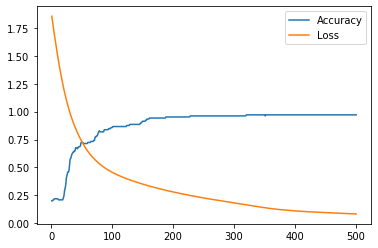

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.lineplot(x=np.linspace(1,501, num=500), y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x=np.linspace(1,501, num=500), y = history.history['loss'], label='Loss')


In [17]:
print(x_test[0])
print(x_test[0:1])
y_pred = model.predict(x_test[0:1])
print(y_pred)
print(y_test[0])

[-0.10694994 -0.55721505  0.70793846  1.50872803]
[[-0.10694994 -0.55721505  0.70793846  1.50872803]]
[[6.0429978e-05 2.9332722e-03 9.9700636e-01]]
[0 0 1]
